In [256]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

We analyze the stationary solutions of the Schroedinger equation in a one dimensional box 

We consider a box from -L to L and discretize the interval in nPoints number of points

In [23]:
L = 0.5
nPoints = 101

In [24]:
x = np.linspace(-L,L,nPoints)
dx = x[1]-x[0]

In [25]:
dx

0.010000000000000009

In [26]:
two = np.full(nPoints,-2)
one = np.full(nPoints-1,1)
Lapl = np.diag(two)+np.diag(one,1)+np.diag(one,1).T
Lapl = Lapl/dx**2
# impose the Dirichlet bc
LaplDbc = Lapl
LaplDbc[0,0] = 0
LaplDbc[0,1] = 0
LaplDbc[1,0] = 0
LaplDbc[nPoints-1,nPoints-1] = 0
LaplDbc[nPoints-1,nPoints-2] = 0
LaplDbc[nPoints-2,nPoints-1] = 0
K = -0.5*LaplDbc
K

array([[   -0.,    -0.,    -0., ...,    -0.,    -0.,    -0.],
       [   -0., 10000., -5000., ...,    -0.,    -0.,    -0.],
       [   -0., -5000., 10000., ...,    -0.,    -0.,    -0.],
       ...,
       [   -0.,    -0.,    -0., ..., 10000., -5000.,    -0.],
       [   -0.,    -0.,    -0., ..., -5000., 10000.,    -0.],
       [   -0.,    -0.,    -0., ...,    -0.,    -0.,    -0.]])

In [27]:
n = 3 # odd numbers
psi = np.cos(np.pi/(2*L)*n*x)
Kpsi = np.dot(K,psi)
E = 0.5*(np.pi/(2*L))**2 * n**2
print('E = ',E)
#psi

E =  44.41321980490211


In [37]:
n = 2 # even numbers
psi = np.sin(np.pi/(2*L)*n*x)
Kpsi = np.dot(K,psi)
E = 0.5*(np.pi/(2*L))**2 * n**2
print('E = ',E)
#psi

E =  19.739208802178716


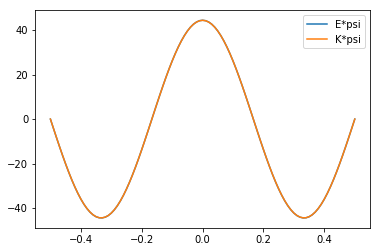

In [28]:
plt.plot(x,E*psi,label='E*psi')
plt.plot(x,Kpsi,label='K*psi')
plt.legend()

This implementation of the Laplacian seems to work as expected. Now we introduce a potential and try to find the eigenvalues and eigenvectors of the Hamiltonian in this setup

## Solution for $V = 0$

In [54]:
V = np.zeros(nPoints)

In [55]:
K = -0.5*LaplDbc
H = K + V

In [56]:
E,psi = np.linalg.eigh(H)
psi = psi.T

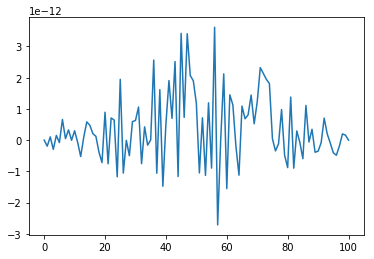

In [57]:
n = 2
diffe = np.dot(H,psi[n]) - E[n]*psi[n]
plt.plot(diffe)

4.934396342679719


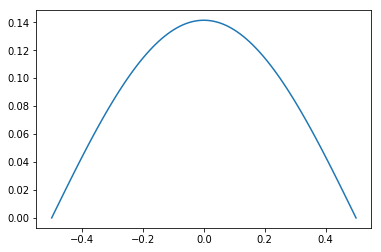

In [58]:
n = 2
print(E[n])
plt.plot(x,psi[n])

Implement the Numeerov algorith

In [75]:
ten = np.full(nPoints,10)
one = np.full(nPoints-1,1)
B = np.diag(ten)+np.diag(one,1)+np.diag(one,1).T
B = B/12
Bm1 = np.linalg.inv(B)

In [76]:
H = np.dot(Bm1,K)
E,psi = np.linalg.eigh(H)
psi = psi.T

44.412784837557325


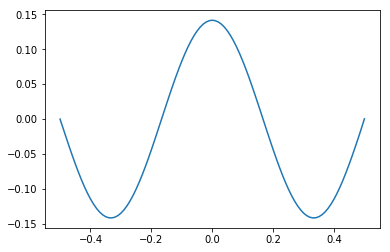

In [77]:
n = 4
print(E[n])
plt.plot(x,psi[n])

## Solution for the potential well

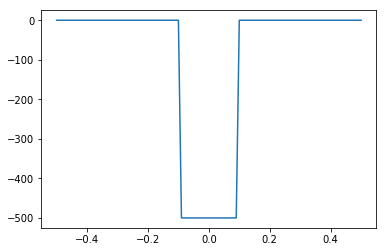

In [89]:
V = np.zeros(nPoints)
V0 = 500
Vstep = int((nPoints-1)/10)
p0 = int((nPoints-1)/2)
for i in range(Vstep):
    V[p0+i] = -V0
    V[p0-i] = -V0
plt.plot(x,V)

In [90]:
K = -0.5*LaplDbc
H = K + V

In [91]:
E,psi = np.linalg.eigh(H)
psi = psi.T

E =  102.36315232855327


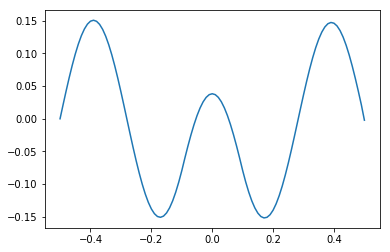

In [95]:
n = 5
print('E = ',E[n])
plt.plot(x,psi[n])